# Limpieza



In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv("10.000_Empresas_mas_Grandes_del_País_20251116.csv")

In [151]:
df.rename(columns={'Año de Corte': 'AÑO DE CORTE'}, inplace=True)

In [152]:
# Cambio del tipo de datos
df['INGRESOS OPERACIONALES'] = df['INGRESOS OPERACIONALES'].astype(str).str.replace('$', '', regex=False)
df['INGRESOS OPERACIONALES'] = pd.to_numeric(df['INGRESOS OPERACIONALES'], errors='coerce')

df['GANANCIA (PÉRDIDA)'] = df['GANANCIA (PÉRDIDA)'].astype(str).str.replace('$', '', regex=False)
df['GANANCIA (PÉRDIDA)'] = pd.to_numeric(df['GANANCIA (PÉRDIDA)'], errors='coerce')

df['TOTAL ACTIVOS'] = df['TOTAL ACTIVOS'].astype(str).str.replace('$', '', regex=False)
df['TOTAL ACTIVOS'] = pd.to_numeric(df['TOTAL ACTIVOS'], errors='coerce')

df['TOTAL PASIVOS'] = df['TOTAL PASIVOS'].astype(str).str.replace('$', '', regex=False)
df['TOTAL PASIVOS'] = pd.to_numeric(df['TOTAL PASIVOS'], errors='coerce')

df['TOTAL PATRIMONIO'] = df['TOTAL PATRIMONIO'].astype(str).str.replace('$', '', regex=False)
df['TOTAL PATRIMONIO'] = pd.to_numeric(df['TOTAL PATRIMONIO'], errors='coerce')


In [153]:
df['CIIU'] = df['CIIU'].astype(str).str.replace(',', '', regex=False)
df['CIIU'] = df['CIIU'].str.zfill(4)

In [154]:
df['RAZÓN SOCIAL'] = df['RAZÓN SOCIAL'].str.upper() \
                                             .str.strip() \
                                             .str.replace(r'\s+', ' ', regex=True) \
                                             .str.replace('.', '', regex=False) \
                                             .str.replace(',', '', regex=False)

mapa_nombres = df[['NIT', 'RAZÓN SOCIAL']].drop_duplicates(subset='NIT', keep='first')
diccionario_nombres = pd.Series(mapa_nombres['RAZÓN SOCIAL'].values, index=mapa_nombres['NIT']).to_dict()
df['RAZÓN SOCIAL'] = df['NIT'].map(diccionario_nombres)

In [155]:
lista_valores_unicos = df['NIT'].unique().tolist()
print(len(lista_valores_unicos))

13976


In [156]:
lista_valores_unicos2 = df['RAZÓN SOCIAL'].unique().tolist()
print(len(lista_valores_unicos2))

13968


In [157]:
conteo_nit_por_razon = df.groupby('RAZÓN SOCIAL')['NIT'].nunique()

razones_compartidas = conteo_nit_por_razon[conteo_nit_por_razon > 1]

print(f"Se encontraron {len(razones_compartidas)} Razones Sociales que son utilizadas por más de un NIT.")


for razon_problematica in razones_compartidas.head(8).index:
    print(f"\nRazón Social: '{razon_problematica}'")
    nits_asociados = df[df['RAZÓN SOCIAL'] == razon_problematica]['NIT'].unique()
    print("  NITs asociados:")
    for nit in nits_asociados:
        print(f"  - {nit}")

Se encontraron 8 Razones Sociales que son utilizadas por más de un NIT.

Razón Social: 'AGENCIA DE ADUANAS DHL GLOBAL FORWARDING COLOMBIA SA NIVEL 1'
  NITs asociados:
  - 860,030,380
  - 830,002,397

Razón Social: 'AYESA INGENIERIA Y ARQUITECTURA SAU SUCURSAL COLOMBIA'
  NITs asociados:
  - 900,494,141
  - 900,659,534

Razón Social: 'CONVIAS SAS'
  NITs asociados:
  - 802,008,095
  - 811,009,579

Razón Social: 'ESE HOSPITAL SAN RAFAEL'
  NITs asociados:
  - 891,780,008
  - 891,190,011

Razón Social: 'GRUPO RAMOS CHARRY SAS'
  NITs asociados:
  - 900,469,949
  - 900,994,919

Razón Social: 'POLIMIX CONCRETO COLOMBIA SAS'
  NITs asociados:
  - 830,106,474
  - 900,641,421

Razón Social: 'RADIOLOGOS ASOCIADOS SAS'
  NITs asociados:
  - 891,409,390
  - 890,109,666

Razón Social: 'SUMOTO SA'
  NITs asociados:
  - 800,235,505
  - 814,004,582


### Diccionario  CIIU

In [158]:
diccionario_CIIU = {
    '0610': 'Extracción de petróleo crudo',
    '1921': 'Fabricación de productos de hornos de coque',
    '4661': 'Comercio al por mayor de combustibles sólidos, líquidos, gaseosos y productos conexos',
    '0510': 'Extracción de hulla (carbón de piedra)',
    '4711': 'Comercio al por menor en establecimientos no especializados con surtido compuesto principalmente por alimentos, bebidas o tabaco',
    '3513': 'Distribución de energía eléctrica',
    '8430': 'Actividades de planes de seguridad social de afiliación obligatoria',
    '6120': 'Actividades de telecomunicaciones inalámbricas',
    '5111': 'Transporte aéreo nacional de pasajeros',
    '4741': 'Comercio al por menor de computadores, equipo periférico, programas de informática y equipo de telecomunicaciones en establecimientos especializados',
    '3511': 'Generación de energía eléctrica',
    '4632': 'Comercio al por mayor de bebidas y tabaco',
    '4930': 'Transporte público automotor',
    '6110': 'Actividades de telecomunicaciones alámbricas',
    '1103': 'Producción de malta, elaboración de cervezas y otras bebidas malteadas',
    '4774': 'Comercio al por menor de artículos médicos y ortopédicos en establecimientos especializados',
    '7010': 'Actividades de administración empresarial',
    '4652': 'Comercio al por mayor de equipo, partes y piezas electrónicos y de telecomunicaciones',
    '4773': 'Comercio al por menor de productos farmacéuticos y medicinales, cosméticos y artículos de tocador en establecimientos especializados',
    '1104': 'Elaboración de bebidas no alcohólicas, producción de aguas minerales y de otras aguas embotelladas',
    '0723': 'Extracción de minerales de níquel y otros minerales de la familia del níquel',
    '2910': 'Fabricación de vehículos automotores y sus motores',
    '2013': 'Fabricación de plásticos en formas primarias',
    '3512': 'Transmisión de energía eléctrica',
    '4511': 'Comercio de vehículos automotores nuevos',
    '1090': 'Elaboración de alimentos preparados para animales',
    '4645': 'Comercio al por mayor de productos farmacéuticos, medicinales, cosméticos y de tocador',
    '3520': 'Producción de gas; distribución de combustibles gaseosos por tuberías',
    '6499': 'Otras actividades de servicio financiero, excepto las de seguros y pensiones n.c.p.',
    '4669': 'Comercio al por mayor de otros productos n.c.p.',
    '1011': 'Procesamiento y conservación de carne y productos cárnicos',
    '4731': 'Comercio al por menor de combustible para automotores',
    '2012': 'Fabricación de abonos y compuestos inorgánicos nitrogenados',
    '8220': 'Actividades de centros de llamadas (call centers)',
    '8699': 'Otras actividades de atención de la salud humana',
    '4719': 'Comercio al por menor en establecimientos no especializados, con surtido compuesto principalmente por productos diferentes de alimentos (víveres en general), bebidas y tabaco',
    '1082': 'Elaboración de cacao, chocolate y productos de confitería',
    '2394': 'Fabricación de cemento, cal y yeso',
    '2511': 'Fabricación de productos metálicos para uso estructural',
    '1051': 'Elaboración de productos lácteos',
    '4111': 'Construcción de edificios residenciales',
    '4799': 'Otro comercio al por menor no realizado en establecimientos, puestos de venta o mercados',
    '2592': 'Tratamiento y revestimiento de metales; mecanizado',
    '1040': 'Elaboración de aceites y grasas de origen vegetal y animal',
    '0145': 'Cría de ovejas y cabras',
    '4651': 'Comercio al por mayor de computadores, equipo periférico y programas de informática',
    '1089': 'Elaboración de otros productos alimenticios n.c.p.',
    '1062': 'Descafeinado y elaboración de otros derivados del café',
    '4620': 'Comercio al por mayor de materias primas agropecuarias; animales vivos',
    '1061': 'Trilla de café',
    '2023': 'Fabricación de jabones y detergentes, preparados para limpiar y pulir; perfumes y preparados de tocador',
    '4641': 'Comercio al por mayor de productos textiles, productos confeccionados para uso doméstico',
    '1709': 'Fabricación de otros artículos de papel y cartón',
    '0722': 'Extracción de minerales de metales preciosos',
    '4631': 'Comercio al por mayor de productos alimenticios',
    '5229': 'Otras actividades complementarias al transporte',
    '8610': 'Actividades de hospitales y clínicas, con internación',
    '4663': 'Comercio al por mayor de materiales de construcción, artículos de ferretería, pinturas, productos de vidrio, equipo y materiales de fontanería y calefacción',
    '4690': 'Comercio al por mayor de otros tipos de maquinaria y equipo n.c.p.',
    '1701': 'Fabricación de pulpas (pastas) celulósicas; papel y cartón',
    '4659': 'Comercio al por mayor de otros tipos de maquinaria y equipo n.c.p.',
    '6431': 'Fondos de inversión y entidades similares',
    '3091': 'Fabricación de motocicletas',
    '2410': 'Industrias básicas de hierro y de acero',
    '0125': 'Cultivo de otros árboles y arbustos frutales y de nueces',
    '2393': 'Fabricación de otros productos de arcilla y cerámica n.c.p., para uso estructural',
    '1071': 'Elaboración y refinación de azúcar',
    '1032': 'Elaboración de jugos de frutas, legumbres y hortalizas',
    '2021': 'Fabricación de plaguicidas y otros productos químicos de uso agropecuario',
    '2310': 'Fabricación de vidrio y productos de vidrio',
    '1052': 'Elaboración de helados y postres a base de leche',
    '4649': 'Comercio al por mayor de otros enseres domésticos n.c.p.',
    '6492': 'Actividades financieras de fondos de empleados y otras formas asociativas del sector solidario',
    '2731': 'Fabricación de cables, alambres y cordones aislados',
    '2229': 'Fabricación de otros productos de plástico n.c.p.',
    '2029': 'Fabricación de otros productos químicos n.c.p.',
    '8621': 'Actividades de la práctica médica, sin internación',
    '7710': 'Alquiler y arrendamiento de vehículos automotores',
    '2750': 'Fabricación de aparatos de uso doméstico',
    '0910': 'Actividades de apoyo para la extracción de petróleo y de gas natural',
    '4662': 'Comercio al por mayor de metales y productos metalíferos',
    '6190': 'Otras actividades de telecomunicaciones',
    '8299': 'Otras actividades de servicio de apoyo a las empresas n.c.p.',
    '1312': 'Tejeduría de productos textiles',
    '4644': 'Comercio al por mayor de aparatos y equipo de uso doméstico',
    '1081': 'Elaboración de productos de panadería',
    '4664': 'Comercio al por mayor de productos químicos básicos, cauchos y plásticos en formas primarias y productos químicos de uso agropecuario',
    '2100': 'Fabricación de productos farmacéuticos, sustancias químicas medicinales y productos botánicos de uso farmacéutico',
    '6511': 'Seguros generales',
    '7020': 'Actividades de consultaría de gestión',
    '1910': 'Fabricación de productos de la refinación del petróleo',
    '6521': 'Servicios de seguros sociales de salud',
    '2221': 'Fabricación de formas básicas de plástico',
    '6201': 'Actividades de desarrollo de sistemas de información (programación)',
    '6020': 'Actividades de programación y transmisión de televisión',
    '1410': 'Confección de prendas de vestir, excepto prendas de piel',
    '1031': 'Elaboración de alimentos y piensos compuestos',
    '6209': 'Otras actividades de tecnologías de información y actividades de servicios informáticos',
    '4220': 'Construcción de proyectos de servicio público',
    '2395': 'Fabricación de artículos de hormigón, cemento y yeso',
    '4923': 'Transporte de carga por carretera',
    '2421': 'Industrias básicas de metales preciosos',
    '3312': 'Mantenimiento y reparación especializado de maquinaria y equipo',
    '4752': 'Comercio al por menor de artículos de ferretería, pinturas y productos de vidrio en establecimientos especializados',
    '6613': 'Actividades de las comisionistas de bolsa',
    '2022': 'Fabricación de pinturas, barnices y revestimientos similares, tintas de impresión y masillas',
    '4210': 'Construcción de carreteras y vías de ferrocarril',
    '2599': 'Fabricación de otros productos elaborados de metal n.c.p.',
    '4771': 'Comercio al por menor de prendas de vestir y sus accesorios (incluye artículos de piel) en establecimientos especializados',
    '8110': 'Actividades combinadas de apoyo a instalaciones',
    '4541': 'Comercio de motocicletas y de sus partes, piezas y accesorios',
    '4643': 'Comercio al por mayor de equipos de radio, televisión y comunicaciones',
    '0620': 'Extracción de gas natural',
    '4290': 'Construcción de otras obras de ingeniería civil',
    '7490': 'Otras actividades profesionales, científicas y técnicas n.c.p.',
    '1521': 'Fabricación de calzado de cuero y piel, con cualquier tipo de suela',
    '4530': 'Comercio de partes, piezas (autopartes) y accesorios (lujos) para vehículos automotores',
    '4761': 'Comercio al por menor de libros, periódicos, materiales y artículos de papelería y escritorio, en establecimientos especializados',
    '6202': 'Actividades de consultoría informática y actividades de administración de instalaciones informáticas',
    '0144': 'Cría de cerdos',
    '5612': 'Servicio de alimentación en cafeterías',
    '4610': 'Comercio al por mayor a cambio de una retribución o por contrata',
    '1513': 'Fabricación de artículos de viaje, bolsos de mano y artículos similares elaborados en cuero; fabricación de artículos de talabartería y guarnicionería',
    '2720': 'Fabricación de pilas, baterías y acumuladores eléctricos',
    '5222': 'Actividades de servicios relacionadas con el transporte acuático',
    '2011': 'Fabricación de sustancias y productos químicos básicos',
    '2014': 'Fabricación de caucho sintético en formas primarias',
    '6494': 'Sociedades de capitalización',
    '2790': 'Fabricación de otros tipos de equipo eléctrico n.c.p.',
    '9499': 'Actividades de otras asociaciones n.c.p.',
    '5611': 'Restaurantes, puestos de comida y servicio de catering',
    '5619': 'Otros tipos de expendio de comidas preparadas n.c.p.',
    '1012': 'Procesamiento y conservación de aves de corral y productos de aves de corral',
    '1702': 'Fabricación de papel y cartón ondulado (corrugado); fabricación de envases, empaques y de embalajes de papel y cartón',
    '2030': 'Fabricación de fibras sintéticas y artificiales',
    '7820': 'Actividades de agencias de empleo temporal',
    '1620': 'Fabricación de hojas de madera para enchapado; fabricación de tableros contrachapados, tableros laminados, tableros de partículas y otros tableros y paneles',
    '5511': 'Alojamiento en hoteles',
    '4729': 'Comercio al por menor de otros productos alimenticios n.c.p., en establecimientos especializados',
    '2211': 'Fabricación de llantas y neumáticos de caucho',
    '2392': 'Fabricación de materiales de arcilla para la construcción',
    '4665': 'Comercio al por mayor de desperdicios, desechos y chatarra',
    '6619': 'Otras actividades auxiliares de las actividades de servicios financieros n.c.p.',
    '0990': 'Actividades de apoyo a otras actividades de extracción',
    '4772': 'Comercio al por menor de todo tipo de calzado y artículos de cuero y marroquinería en establecimientos especializados',
    '4723': 'Comercio al por menor de carnes (incluye aves de corral), productos cárnicos, pescados y productos de mar, en establecimientos especializados',
    '1083': 'Elaboración de productos de café',
    '8692': 'Actividades de apoyo diagnóstico',
    '5310': 'Actividades postales nacionales',
    '1311': 'Preparación e hilatura de fibras textiles',
    '6810': 'Actividades inmobiliarias realizadas con bienes propios o arrendados',
    '1392': 'Fabricación de artículos confeccionados de materiales textiles, excepto prendas de vestir',
    '2711': 'Fabricación de motores, generadores y transformadores eléctricos',
    '7730': 'Alquiler y arrendamiento de otros tipos de maquinaria, equipo y bienes tangibles n.c.p.',
    '6311': 'Procesamiento de datos, alojamiento (hosting) y actividades relacionadas',
    '8129': 'Otras actividades de limpieza de edificios e instalaciones industriales',
    '1399': 'Fabricación de otros artículos textiles n.c.p.',
    '1811': 'Actividades de impresión',
    '0126': 'Cultivo de palma para aceite (palma africana) y otros frutos oleaginosos',
    '8010': 'Actividades de seguridad privada',
    '7830': 'Otras actividades de provisión de recurso humano',
    '4759': 'Comercio al por menor de otros enseres domésticos en establecimientos especializados',
    '5210': 'Almacenamiento y depósito',
    '8211': 'Actividades combinadas de servicios administrativos de oficina',
    '4321': 'Instalaciones eléctricas',
    '7112': 'Actividades de ingeniería y otras actividades conexas de consultoría técnica',
    '1522': 'Fabricación de calzado de materiales textiles, con cualquier tipo de suela',
    '4390': 'Otras actividades especializadas para la construcción de edificios y obras de ingeniería civil',
    '1063': 'Producción de margarina y grasas comestibles similares',
    '4762': 'Comercio al por menor de artículos deportivos, en establecimientos especializados',
    '6399': 'Otras actividades de servicio de información n.c.p.',
    '1020': 'Procesamiento y conservación de pescados, crustáceos y moluscos',
    '4921': 'Transporte de pasajeros',
    '4755': 'Comercio al por menor de artículos de iluminación y sus accesorios, en establecimientos especializados',
    '3290': 'Otras industrias manufactureras n.c.p.',
    '9311': 'Gestión de instalaciones deportivas',
    '9603': 'Pompas fúnebres y actividades conexas',
    '8020': 'Actividades de servicios de sistemas de seguridad',
    '7310': 'Publicidad',
    '4653': 'Comercio al por mayor de maquinaria, equipo y materiales agropecuarios',
    '2930': 'Fabricación de partes, piezas (autopartes) y accesorios (lujos) para vehículos automotores',
    '2920': 'Fabricación de carrocerías para vehículos automotores; fabricación de remolques y semirremolques',
    '0729': 'Extracción de otros minerales metalíferos no ferrosos n.c.p. (excepto níquel)',
    '2219': 'Fabricación de otros productos de caucho n.c.p.',
    '0322': 'Acuicultura de agua dulce',
    '2593': 'Fabricación de artículos de alambre, productos de tornillería y resortes',
    '5613': 'Servicio de catering para eventos y otros servicios de comidas',
    '0122': 'Cultivo de plátano y banano',
    '6493': 'Actividades de las fiduciarias',
    '2640': 'Fabricación de aparatos electrónicos de consumo',
    '6920': 'Actividades de contabilidad, teneduría de libros, auditoría financiera y asesoría tributaria',
    '2732': 'Fabricación de otros dispositivos y alambres de uso eléctrico',
    '2819': 'Fabricación de otros tipos de maquinaria y equipo de uso general n.c.p.',
    '8691': 'Actividades de apoyo terapéutico',
    '3250': 'Fabricación de instrumentos, aparatos y materiales médicos y odontológicos (incluido mobiliario)',
    '8121': 'Limpieza general interior de edificios',
    '4791': 'Comercio al por menor realizado a través de internet',
    '1313': 'Acabado de productos textiles',
    '3120': 'Fabricación de muebles y colchones',
    '0130': 'Propagación de plantas (actividades de los viveros, excepto viveros forestales)',
    '6010': 'Actividades de transmisión de radio',
    '7110': 'Actividades de arquitectura e ingeniería y otras actividades conexas de consultoría técnica',
    '4512': 'Comercio de vehículos automotores usados',
    '3110': 'Fabricación de muebles',
    '4754': 'Comercio al por menor de electrodomésticos, muebles, equipo de iluminación y otros enseres domésticos en establecimientos especializados',
    '9007': 'Actividades de espectáculos musicales en vivo',
    '5630': 'Expendio de bebidas alcohólicas para el consumo dentro del establecimiento',
    '0311': 'Pesca marítima',
    '2740': 'Fabricación de equipos eléctricos de iluminación',
    '5914': 'Actividades de exhibición de películas cinematográficas y videos',
    '2212': 'Reencauche de llantas usadas',
    '9609': 'Otras actividades de servicios personales n.c.p.',
    '6910': 'Actividades jurídicas',
    '8530': 'Establecimientos que combinan diferentes niveles de educación',
    '1084': 'Elaboración de comidas y platos preparados',
    '4751': 'Comercio al por menor de productos textiles en establecimientos especializados',
    '5223': 'Actividades de servicios relacionadas con el transporte aéreo',
    '7911': 'Actividades de las agencias de viajes',
    '0149': 'Cría de otros animales n.c.p.',
    '0124': 'Cultivo de frutas tropicales y subtropicales',
    '7320': 'Estudios de mercado y realización de encuestas de opinión pública',
    '4732': 'Comercio al por menor de lubricantes (aceites, grasas), aditivos y productos de limpieza para vehículos automotores',
    '9511': 'Mantenimiento y reparación de computadores y de equipo periférico',
    '4520': 'Mantenimiento y reparación de vehículos automotores',
    '0112': 'Cultivo de arroz',
    '4112': 'Construcción de edificios no residenciales',
    '4724': 'Comercio al por menor de productos de panadería, confitería y bizcochería en establecimientos especializados',
    '2399': 'Fabricación de otros productos minerales no metálicos n.c.p.',
    '5221': 'Actividades de servicios relacionadas con el transporte terrestre',
    '0210': 'Silvicultura y otras actividades forestales',
    '2591': 'Forja, prensado, estampado y laminado de metal; pulvimetalurgia',
    '7420': 'Actividades de fotografía',
    '9512': 'Mantenimiento y reparación de equipos de comunicación',
    '4329': 'Otras instalaciones para obras de construcción',
    '5320': 'Actividades de mensajería',
    '8559': 'Otros tipos de educación n.c.p.',
    '3311': 'Mantenimiento y reparación especializado de productos elaborados de metal',
    '7111': 'Actividades de arquitectura',
    '6130': 'Actividades de telecomunicación satelital',
    '0312': 'Pesca de agua dulce',
    '0812': 'Extracción de arena y piedra',
    '2432': 'Fundición de metales no ferrosos',
    '1512': 'Fabricación de artículos de viaje, bolsos de mano y artículos similares; artículos de talabartería y guarnicionería elaborados en otros materiales',
    '2813': 'Fabricación de bombas, compresores, grifos y válvulas',
    '4642': 'Comercio al por mayor de prendas de vestir',
    '6820': 'Actividades inmobiliarias realizadas a cambio de una retribución o por contrata',
    '0141': 'Cría de ganado bovino y bufalino',
    '4722': 'Comercio al por menor de leche, productos lácteos y huevos, en establecimientos especializados',
    '8291': 'Actividades de agencias de cobranza y oficinas de calificación crediticia',
    '0121': 'Cultivo de café',
    '2821': 'Fabricación de maquinaria y equipo para la agricultura y la ganadería',
    '0161': 'Actividades de apoyo a la agricultura',
    '0163': 'Actividades de preparación de la cosecha y poscosecha',
    '5911': 'Actividades de producción de películas cinematográficas, videos, programas, anuncios y comerciales de televisión',
    '5224': 'Manipulación de carga',
    '3319': 'Mantenimiento y reparación de otros tipos de equipo y aparatos n.c.p.',
    '5629': 'Actividades de otros servicios de comidas',
    '5621': 'Catering para eventos',
    '9200': 'Actividades de juegos de azar y apuestas',
    '3314': 'Mantenimiento y reparación de equipo eléctrico',
    '6422': 'Actividades de las compañías de holding (tenedoras)',
    '5920': 'Actividades de grabación de sonido y edición de música',
    '0129': 'Cultivo de otras plantas perennes n.c.p.',
    '2822': 'Fabricación de máquinas formadoras de metal y de máquinas herramienta',
    '1420': 'Fabricación de artículos de piel',
    '7740': 'Arrendamiento de propiedad intelectual y productos similares, excepto obras protegidas por derechos de autor',
    '9312': 'Actividades de clubes deportivos',
    '0127': 'Cultivo de plantas con las que se preparan bebidas',
    '0321': 'Acuicultura marítima',
    '8292': 'Actividades de envase y empaque',
    '2829': 'Fabricación de otros tipos de maquinaria y equipo de uso especial n.c.p.',
    '0113': 'Cultivo de hortalizas, raíces y tubérculos',
    '4330': 'Terminación y acabado de edificios y obras de ingeniería civil',
    '4742': 'Comercio al por menor de equipos de audio y de video en establecimientos especializados',
    '5811': 'Edición de libros',
    '8230': 'Organización de convenciones y eventos comerciales',
    '4721': 'Comercio al por menor de frutas y verduras, en establecimientos especializados',
    '8710': 'Actividades de atención residencial medicalizada',
    '1033': 'Elaboración de productos de molinería y almidones',
    '1610': 'Aserrado, acepillado e impregnación de la madera',
    '1072': 'Elaboración de panela',
    '2651': 'Fabricación de equipo de medición, prueba, navegación y control',
    '0150': 'Explotación mixta (agrícola y pecuaria)',
    '4322': 'Instalaciones de fontanería, calefacción y aire acondicionado',
    '2431': 'Fundición de hierro y de acero',
    '2816': 'Fabricación de equipo de elevación y manipulación',
    '6312': 'Portales web',
    '7990': 'Otros servicios de reserva y actividades relacionadas',
    '0820': 'Extracción de piedra, arena, arcillas comunes, yeso y anhidrita',
    '9321': 'Actividades de parques de atracciones y parques temáticos',
    '5519': 'Otros tipos de alojamiento n.c.p.',
    '9601': 'Lavado y limpieza, incluso la limpieza en seco, de productos textiles y de piel',
    '6630': 'Actividades de administración de fondos',
    '4769': 'Comercio al por menor de otros artículos culturales y de entretenimiento n.c.p. en establecimientos especializados',
    '5813': 'Edición de periódicos, revistas y otras publicaciones periódicas',
    '2620': 'Fabricación de computadores y de equipo periférico',
    '8622': 'Actividades de la práctica odontológica',
    '4312': 'Preparación del terreno',
    '3011': 'Construcción de barcos y de estructuras flotantes',
    '3092': 'Fabricación de bicicletas y de sillas de ruedas para personas con discapacidad',
    '2391': 'Fabricación de productos abrasivos',
    '2712': 'Fabricación de aparatos de distribución y control de la energía eléctrica',
    '2429': 'Industrias básicas de otros metales no ferrosos',
    '7120': 'Ensayos y análisis técnicos',
    '2670': 'Fabricación de instrumentos ópticos y equipo fotográfico',
    '7210': 'Investigaciones y desarrollo experimental en el campo de las ciencias naturales y la ingeniería',
    '1630': 'Fabricación de partes y piezas de madera, carpintería y ebanistería para la construcción',
    '3012': 'Construcción de embarcaciones de recreo y de deporte',
    '1511': 'Curtido y recurtido de cueros; recurtido y teñido de pieles',
    '5820': 'Edición de programas de informática (software)',
    '3900': 'Actividades de descontaminación y otros servicios de gestión de desechos',
    '0811': 'Extracción de piedra, arena y arcillas comunes',
    '8551': 'Formación académica no formal',
    '1101': 'Destilación, rectificación y mezcla de bebidas alcohólicas',
    '6421': 'Actividades de las bolsas de valores',
    '1812': 'Otras actividades de impresión',
    '0164': 'Tratamiento de semillas para propagación',
    '2512': 'Fabricación de tanques, depósitos y recipientes de metal',
    '2513': 'Fabricación de generadores de vapor, excepto calderas de agua caliente para calefacción central',
    '1523': 'Fabricación de calzado de caucho',
    '0119': 'Cultivo de otros productos agrícolas n.c.p.',
    '2825': 'Fabricación de maquinaria y equipo para la elaboración de alimentos, bebidas y tabaco',
    '5514': 'Alojamiento rural',
    '2396': 'Corte, tallado y acabado de la piedra',
    '9329': 'Otras actividades recreativas y de esparcimiento n.c.p.',
    '5121': 'Transporte aéreo nacional de carga',
    '4789': 'Comercio al por menor de otros productos en puestos de venta móviles',
    '5122': 'Transporte aéreo internacional de carga',
    '2630': 'Fabricación de equipos de comunicación',
    '7220': 'Investigaciones y desarrollo experimental en el campo de las ciencias sociales y las humanidades',
    '9521': 'Reparación de aparatos electrónicos de consumo',
    '0899': 'Extracción de otros minerales n.c.p.',
    '8523': 'Educación media técnica y de formación para el trabajo',
    '5012': 'Transporte marítimo internacional de carga',
    '0111': 'Cultivo de cereales (excepto arroz), legumbres y semillas oleaginosas',
    '8513': 'Educación preescolar',
    '8413': 'Regulación de las actividades de rovisión de servicios de salud, educación, cultura y otros servicios sociales, excepto seguridad social',
    '0114': 'Cultivo de tabaco',
    '0162': 'Actividades de apoyo a la ganadería',
    '2824': 'Fabricación de maquinaria para la minería, la explotación de canteras y la construcción',
    '9101': 'Actividades de bibliotecas y archivos',
    '3220': 'Fabricación de instrumentos musicales',
    '0128': 'Cultivo de especias, plantas aromáticas y medicinales',
    '3514': 'Comercialización de energía eléctrica',
    '3210': 'Fabricación de joyas, bisutería y artículos conexos',
    '8521': 'Educación básica primaria',
    '1394': 'Fabricación de tapices y alfombras para pisos',
    '9412': 'Actividades de asociaciones profesionales',
    '9103': 'Actividades de jardines botánicos, zoológicos y reservas naturales',
    '6629': 'Otras actividades auxiliares de las actividades de seguros y pensiones',
    '5590': 'Otros tipos de alojamiento',
    '3700': 'Evacuación y tratamiento de aguas residuales',
    '8720': 'Actividades de atención residencial para personas con discapacidad mental, enfermedad mental y abuso de sustancias',
    '9004': 'Actividades de salas de conciertos, teatros y otras actividades de espectáculos en vivo',
    '3240': 'Fabricación de juegos, juguetes y artículos deportivos',
    '1393': 'Fabricación de artículos de cordelería, bramantería, redes y cuerdas',
    '0220': 'Extracción de madera',
    '7810': 'Actividades de agencias de empleo',
    '4311': 'Demolición',
    '3099': 'Fabricación de otros tipos de equipo de transporte n.c.p.',
    '0240': 'Actividades de servicios de apoyo a la silvicultura',
    '4542': 'Mantenimiento y reparación de motocicletas y de sus partes y piezas',
    '3320': 'Instalación especializada de maquinaria y equipo industrial',
    '1690': 'Fabricación de otros productos de madera; fabricación de artículos de corcho, cestería y espartería',
    '6615': 'Actividades de los profesionales de compra y venta de divisas',
    '7410': 'Actividades especializadas de diseño',
    '8899': 'Otras actividades de asistencia social sin alojamiento n.c.p.',
    '2610': 'Fabricación de componentes y tableros electrónicos',
    '1102': 'Elaboración de bebidas fermentadas no destiladas',
    '1820': 'Producción de copias a partir de grabaciones originales',
    '4775': 'Comercio al por menor de artículos y utensilios de uso doméstico',
    '1200': 'Elaboración de productos de tabaco',
    '5512': 'Alojamiento en apartahoteles',
    '2812': 'Fabricación de equipo de potencia hidráulica y neumática',
    '8890': 'Otras actividades de asistencia social sin alojamiento',
    '3812': 'Recolección de desechos peligrosos',
    '5513': 'Alojamiento en centros vacacionales',
    '0123': 'Cultivo de cítricos',
    '1430': 'Fabricación de artículos de punto y ganchillo',
    '3830': 'Recuperación de materiales',
    '8730': 'Actividades de atención en establecimientos para el cuidado de personas mayores',
    '5022': 'Transporte fluvial internacional de carga',
    '8130': 'Actividades de paisajismo y servicios de mantenimiento de zonas verdes',
    '3315': 'Mantenimiento y reparación de equipo de transporte, excepto los vehículos automotores',
    '0892': 'Extracción de turba',
    '6495': 'Otras actividades de distribución de fondos',
    '1030': 'Elaboración de aceites y grasas de origen animal',
    '7500': 'Actividades veterinarias',
    '3811': 'Recolección de desechos no peligrosos',
    '3600': 'Captación, tratamiento y distribución de agua',
    '5112': 'Transporte aéreo internacional de pasajeros',
    '4912': 'Transporte de carga por vía férrea',
    '3822': 'Tratamiento y disposición de desechos peligrosos',
    '3821': 'Tratamiento y disposición de desechos no peligrosos',
    '4792': 'Comercio al por menor realizado a través de casas de venta directa',
    '3313': 'Mantenimiento y reparación de equipo electrónico y óptico',
    '0143': 'Cría de caballos y otros equinos',
    '9006': 'Actividades de apoyo a las artes escénicas',
    '9900': 'Actividades de organizaciones y órganos extraterritoriales',
    '3030': 'Fabricación de aeronaves, naves espaciales y maquinaria conexa',
    '4753': 'Comercio al por menor de tapices, alfombras y cubrimientos para paredes y pisos en establecimientos especializados',
    '6621': 'Actividades de agentes y corredores de seguros',
    '5011': 'Transporte marítimo nacional de pasajeros',
    '8512': 'Educación básica secundaria',
    '4911': 'Transporte de pasajeros por vía férrea',
    '3530': 'Suministro de vapor y aire acondicionado',
    '2815': 'Fabricación de hornos, hogares y quemadores industriales',
    '2814': 'Fabricación de cojinetes, engranajes, trenes de engranajes y piezas de transmisión',
    '0230': 'Recolección de productos forestales diferentes a la madera',
    '6491': 'Arrendamiento financiero (leasing)',
    '1391': 'Fabricación de tejidos de punto y ganchillo',
    '9001': 'Creación teatral',
    '9602': 'Peluquería y otros tratamientos de belleza',
    '7912': 'Actividades de operadores turísticos',
    '8414': 'Actividades de relaciones exteriores',
    '8511': 'Educación de la primera infancia',
    '6424': 'Actividades de las compañías de holding (tenedoras), n.c.p.',
    '0115': 'Cultivo de caña de azúcar'
}

In [159]:
df['DESCRIPCCIÓN CIIU'] = df['CIIU'].map(diccionario_CIIU)

In [160]:
df

,NIT,RAZÓN SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES,GANANCIA (PÉRDIDA),TOTAL ACTIVOS,TOTAL PASIVOS,TOTAL PATRIMONIO,AÑO DE CORTE,DESCRIPCCIÓN CIIU
0,"899,999,068",ECOPETROL SA,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,0610,MINERO,144.82,33.41,216.85,125.81,91.03,"2,022",Extracción de petróleo crudo
1,"900,112,515",REFINERIA DE CARTAGENA SAS,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,1921,MANUFACTURA,27.86,2.19,42.84,16.48,26.36,"2,022",Fabricación de productos de hornos de coque
2,"830,095,213",ORGANIZACIÓN TERPEL SA,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,4661,COMERCIO,23.60,0.33,7.48,4.47,3.01,"2,022","Comercio al por mayor de combustibles sólidos,..."
3,"860,069,804",CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,0510,MINERO,16.39,6.05,10.45,9.00,1.45,"2,022",Extracción de hulla (carbón de piedra)
4,"800,021,308",DRUMMOND LTD,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,0510,MINERO,15.27,2.16,14.27,6.34,7.93,"2,022",Extracción de hulla (carbón de piedra)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,"901,266,264",ALIA2 DISTRIBUCIONES SAS,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,4719,COMERCIO,0.02,0.00,0.00,0.00,0.00,"2,024",Comercio al por menor en establecimientos no e...
39996,"900,584,429",CI UNIPACK COLOMBIA SAS,SUPERSOCIEDADES,Costa Atlántica,ATLANTICO,BARRANQUILLA-ATLANTICO,1709,MANUFACTURA,0.02,0.00,0.01,0.00,0.01,"2,024",Fabricación de otros artículos de papel y cartón
39997,"807,009,474",DROGAS UNIDAS SAS,SUPERSOCIEDADES,Centro - Oriente,NORTE DE SANTANDER,CUCUTA-NORTE DE SANTANDER,4645,COMERCIO,0.02,0.00,0.01,0.00,0.00,"2,024",Comercio al por mayor de productos farmacéutic...
39998,"830,066,984",REDES Y PROYECTOS DE ENERGIA S A EMPRESA MULTI...,SUPERSOCIEDADES,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,4390,CONSTRUCCIÓN,0.02,-0.00,0.04,0.06,-0.02,"2,024",Otras actividades especializadas para la const...


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NIT                     40000 non-null  object 
 1   RAZÓN SOCIAL            39997 non-null  object 
 2   SUPERVISOR              40000 non-null  object 
 3   REGIÓN                  40000 non-null  object 
 4   DEPARTAMENTO DOMICILIO  40000 non-null  object 
 5   CIUDAD DOMICILIO        40000 non-null  object 
 6   CIIU                    40000 non-null  object 
 7   MACROSECTOR             40000 non-null  object 
 8   INGRESOS OPERACIONALES  40000 non-null  float64
 9   GANANCIA (PÉRDIDA)      40000 non-null  float64
 10  TOTAL ACTIVOS           40000 non-null  float64
 11  TOTAL PASIVOS           40000 non-null  float64
 12  TOTAL PATRIMONIO        40000 non-null  float64
 13  AÑO DE CORTE            40000 non-null  object 
 14  DESCRIPCCIÓN CIIU       40000 non-null

# EDA

## General

In [162]:
conteo_por_año_nit = df.value_counts(subset=['NIT', 'AÑO DE CORTE'])
duplicados = conteo_por_año_nit[conteo_por_año_nit > 1]

if duplicados.empty:
    print("No hay ninguna empresa repetida dentro de un mismo año.")
else:
    print("Empresas y años con registros duplicados:")
    print(duplicados)

No hay ninguna empresa repetida dentro de un mismo año.


In [163]:
conteo_por_año = df.value_counts(subset=['RAZÓN SOCIAL', 'AÑO DE CORTE'])
duplicados = conteo_por_año[conteo_por_año > 1]

if duplicados.empty:
    print("No hay ninguna razon social repetida dentro de un mismo año.")
else:
    print("Razones sociales y años con registros duplicados:")
    print(duplicados)

Razones sociales y años con registros duplicados:
RAZÓN SOCIAL                                                  AÑO DE CORTE
CONVIAS SAS                                                   2,024           2
RADIOLOGOS ASOCIADOS SAS                                      2,024           2
GRUPO RAMOS CHARRY SAS                                        2,023           2
RADIOLOGOS ASOCIADOS SAS                                      2,022           2
                                                              2,021           2
GRUPO RAMOS CHARRY SAS                                        2,024           2
SUMOTO SA                                                     2,021           2
                                                              2,022           2
                                                              2,023           2
CONVIAS SAS                                                   2,023           2
                                                              2,022        

In [164]:
print("Analisis estadistico datos financieros:")
print(df[['INGRESOS OPERACIONALES', 'GANANCIA (PÉRDIDA)', 'TOTAL ACTIVOS', 'TOTAL PASIVOS', 'TOTAL PATRIMONIO']].describe())

Analisis estadistico datos financieros:
       INGRESOS OPERACIONALES  GANANCIA (PÉRDIDA)  TOTAL ACTIVOS  \
count            40000.000000        40000.000000   40000.000000   
mean                 0.167670            0.013160       0.218061   
std                  1.392991            0.254042       2.369618   
min                  0.010000           -3.210000       0.000000   
25%                  0.030000            0.000000       0.020000   
50%                  0.040000            0.000000       0.030000   
75%                  0.100000            0.010000       0.090000   
max                144.820000           33.410000     216.850000   

       TOTAL PASIVOS  TOTAL PATRIMONIO  
count   40000.000000      40000.000000  
mean        0.110702          0.107080  
std         1.345162          1.117528  
min         0.000000         -3.690000  
25%         0.010000          0.010000  
50%         0.020000          0.010000  
75%         0.050000          0.040000  
max       130.54000

In [165]:
print("Número de empresas por Región:")
print(df['REGIÓN'].value_counts())

Número de empresas por Región:
REGIÓN
Bogotá - Cundinamarca    18637
Antioquia                 7531
Costa Pacífica            4278
Costa Atlántica           4232
Centro - Oriente          2379
Otros                     1524
Eje Cafetero              1419
Name: count, dtype: int64


In [166]:
print("Total de ingresos operacionales por región:")
ingresos_por_region = df.groupby('REGIÓN')['INGRESOS OPERACIONALES'].sum().sort_values(ascending=False)
print(ingresos_por_region)

Total de ingresos operacionales por región:
REGIÓN
Bogotá - Cundinamarca    3914.02
Antioquia                1109.65
Costa Atlántica           669.89
Costa Pacífica            555.92
Centro - Oriente          212.97
Eje Cafetero              150.06
Otros                      94.27
Name: INGRESOS OPERACIONALES, dtype: float64


In [167]:
# Unicas en todos los años
print("Número de empresas unicas por Macrosector")
df_empresas_unicas = df.drop_duplicates(subset='NIT', keep='first')
conteo_unico_sectores = df_empresas_unicas['MACROSECTOR'].value_counts()

print(conteo_unico_sectores)

Número de empresas unicas por Macrosector
MACROSECTOR
SERVICIOS       4928
COMERCIO        4472
MANUFACTURA     2425
CONSTRUCCIÓN    1305
AGROPECUARIO     583
MINERO           263
Name: count, dtype: int64


In [168]:
# Conteo en todos los años
print("Número de empresas por Macrosector:")
print(df['MACROSECTOR'].value_counts())

Número de empresas por Macrosector:
MACROSECTOR
COMERCIO        13617
SERVICIOS       12764
MANUFACTURA      8017
CONSTRUCCIÓN     3109
AGROPECUARIO     1723
MINERO            770
Name: count, dtype: int64


In [169]:
print("Suma de ganancias por Macrosector:")
ganancia_por_sector = df.groupby('MACROSECTOR')['GANANCIA (PÉRDIDA)'].sum().sort_values(ascending=False)
print(ganancia_por_sector)

Suma de ganancias por Macrosector:
MACROSECTOR
SERVICIOS       226.34
MINERO          144.19
MANUFACTURA      76.70
COMERCIO         52.07
CONSTRUCCIÓN     19.20
AGROPECUARIO      7.90
Name: GANANCIA (PÉRDIDA), dtype: float64


In [170]:
print("Top n empresas con mayores ingresos:")
topn_n_ingresos = df.sort_values(by='INGRESOS OPERACIONALES', ascending=False).head(10)
print(topn_n_ingresos[['RAZÓN SOCIAL', 'INGRESOS OPERACIONALES', 'REGIÓN', 'MACROSECTOR']])

Top n empresas con mayores ingresos:
                     RAZÓN SOCIAL  INGRESOS OPERACIONALES  \
0                    ECOPETROL SA                  144.82   
20000                ECOPETROL SA                  129.51   
29470                ECOPETROL SA                  113.92   
10000                ECOPETROL SA                   84.95   
20001  REFINERIA DE CARTAGENA SAS                   32.05   
1      REFINERIA DE CARTAGENA SAS                   27.86   
20002                     AVIANCA                   27.15   
30002  REFINERIA DE CARTAGENA SAS                   25.86   
30003      ORGANIZACIÓN TERPEL SA                   24.75   
2          ORGANIZACIÓN TERPEL SA                   23.60   

                      REGIÓN  MACROSECTOR  
0      Bogotá - Cundinamarca       MINERO  
20000  Bogotá - Cundinamarca       MINERO  
29470  Bogotá - Cundinamarca       MINERO  
10000  Bogotá - Cundinamarca       MINERO  
20001        Costa Atlántica  MANUFACTURA  
1            Costa Atlántic

In [171]:
print("Top n empresas con mayores pérdidas:")
top_n_perdidas = df.sort_values(by='GANANCIA (PÉRDIDA)', ascending=True).head(10)
print(top_n_perdidas[['RAZÓN SOCIAL', 'GANANCIA (PÉRDIDA)', 'REGIÓN', 'MACROSECTOR']])

Top n empresas con mayores pérdidas:
                                 RAZÓN SOCIAL  GANANCIA (PÉRDIDA)  \
21296                        JGDB HOLDING SAS               -3.21   
10025                                 AVIANCA               -2.10   
426             PARTNERS TELECOM COLOMBIA SAS               -1.46   
30021                           AIR-E SAS ESP               -1.43   
30299           PARTNERS TELECOM COLOMBIA SAS               -1.34   
20067           UNE EPM TELECOMUNICACIONES SA               -1.14   
30179  PAREX RESOURCES (COLOMBIA) AG SUCURSAL               -1.02   
20312           PARTNERS TELECOM COLOMBIA SAS               -0.87   
10094             SIERRACOL ENERGY ANDINA LLC               -0.86   
30288                           CI PRODECO SA               -0.85   

                      REGIÓN MACROSECTOR  
21296  Bogotá - Cundinamarca   SERVICIOS  
10025        Costa Atlántica   SERVICIOS  
426    Bogotá - Cundinamarca   SERVICIOS  
30021        Costa Atlántica   

## Por año

In [172]:
print("Número de registros por año de Corte:")
print(df['AÑO DE CORTE'].value_counts().sort_index())

Número de registros por año de Corte:
AÑO DE CORTE
2,021    10000
2,022    10000
2,023    10000
2,024    10000
Name: count, dtype: int64


In [173]:
print("Numero de empresas por año de corte:")
empresas_por_año = df.groupby('AÑO DE CORTE')['NIT'].nunique()
print(empresas_por_año)

Numero de empresas por año de corte:
AÑO DE CORTE
2,021    10000
2,022    10000
2,023    10000
2,024    10000
Name: NIT, dtype: int64


In [174]:
# unicas año por año
print("Empresas Únicas por Año y Macrosector:")
conteo_por_grupo = df.groupby(['AÑO DE CORTE', 'MACROSECTOR'])['NIT'].nunique()
tabla_resultado = conteo_por_grupo.unstack(fill_value=0).astype(int)

print(tabla_resultado)


Empresas Únicas por Año y Macrosector:
MACROSECTOR   AGROPECUARIO  COMERCIO  CONSTRUCCIÓN  MANUFACTURA  MINERO  \
AÑO DE CORTE                                                              
2,021                  462      3382           814         2040     196   
2,022                  465      3374           772         2095     208   
2,023                  403      3444           767         1962     184   
2,024                  393      3417           756         1920     182   

MACROSECTOR   SERVICIOS  
AÑO DE CORTE             
2,021              3106  
2,022              3086  
2,023              3240  
2,024              3332  


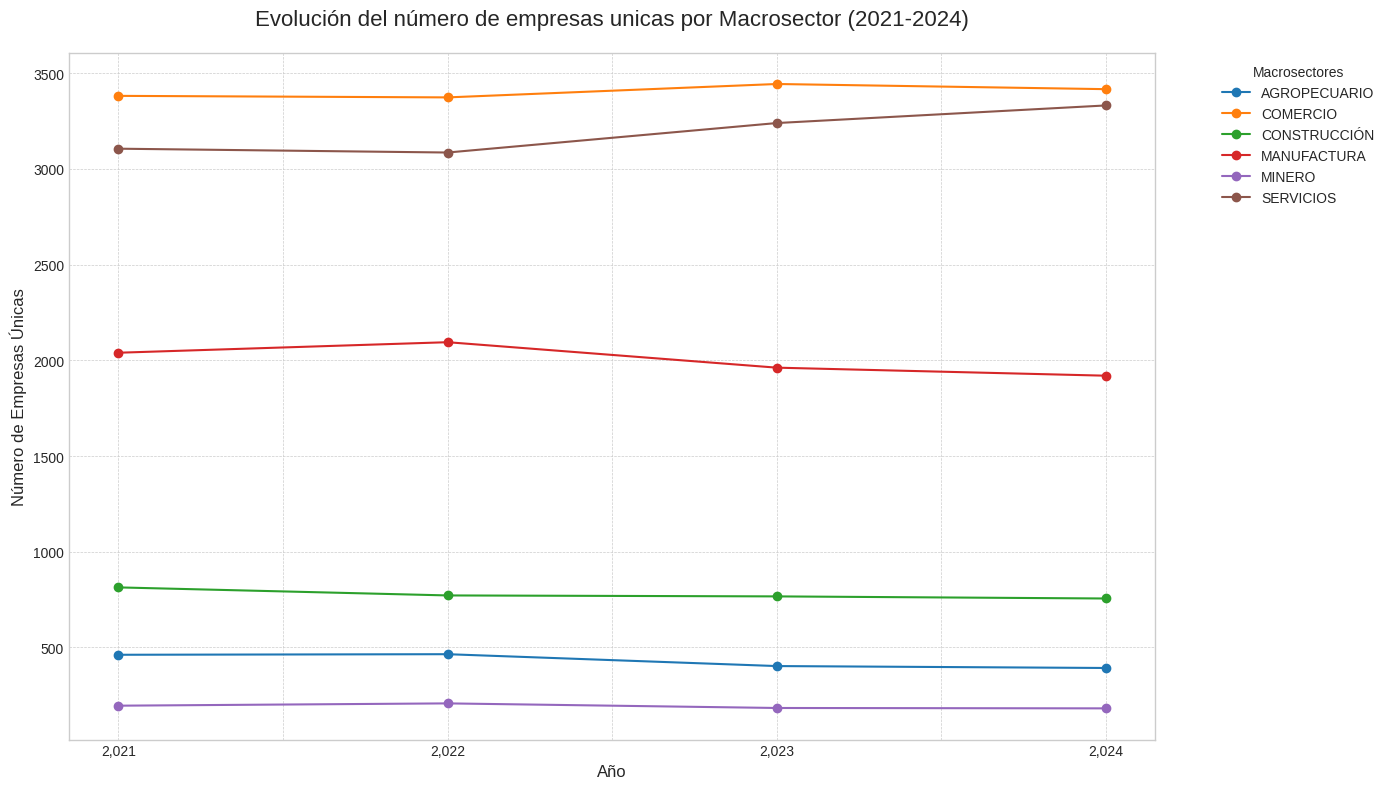

In [175]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

tabla_resultado.plot(kind='line', marker='o', ax=ax)

ax.set_title('Evolución del número de empresas unicas por Macrosector (2021-2024)', fontsize=16, pad=20)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Número de Empresas Únicas', fontsize=12)

ax.legend(title='Macrosectores', bbox_to_anchor=(1.05, 1), loc='upper left')

ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

In [176]:
print("Evolución de Ingresos totales por Año:")
ingresos_por_año = df.groupby('AÑO DE CORTE')['INGRESOS OPERACIONALES'].sum()
print(ingresos_por_año)

Evolución de Ingresos totales por Año:
AÑO DE CORTE
2,021    1306.35
2,022    1727.58
2,023    1908.72
2,024    1764.13
Name: INGRESOS OPERACIONALES, dtype: float64


In [177]:
print("Analisis estadistico datos financieros por año")
columnas_financieras = ['INGRESOS OPERACIONALES', 'GANANCIA (PÉRDIDA)']

estadisticas_por_año = df.groupby('AÑO DE CORTE')[columnas_financieras].describe()
print(estadisticas_por_año)

Analisis estadistico datos financieros por año
             INGRESOS OPERACIONALES                                        \
                              count      mean       std   min   25%   50%   
AÑO DE CORTE                                                                
2,021                       10000.0  0.130635  0.997241  0.01  0.02  0.03   
2,022                       10000.0  0.172758  1.614180  0.02  0.02  0.04   
2,023                       10000.0  0.190872  1.530020  0.02  0.03  0.05   
2,024                       10000.0  0.176413  1.348790  0.02  0.03  0.05   

                           GANANCIA (PÉRDIDA)                                 \
               75%     max              count      mean       std   min  25%   
AÑO DE CORTE                                                                   
2,021         0.07   84.95            10000.0  0.011835  0.199591 -2.10  0.0   
2,022         0.09  144.82            10000.0  0.016621  0.360659 -1.46  0.0   
2,023        

In [178]:
print("Analisis estadistico datos financieros por año")
columnas_financieras = ['TOTAL ACTIVOS', 'TOTAL PASIVOS']
estadisticas_por_año = df.groupby('AÑO DE CORTE')[columnas_financieras].describe()
print(estadisticas_por_año)

Analisis estadistico datos financieros por año
             TOTAL ACTIVOS                                                     \
                     count      mean       std  min   25%   50%   75%     max   
AÑO DE CORTE                                                                    
2,021              10000.0  0.180813  2.035546  0.0  0.01  0.03  0.08  171.60   
2,022              10000.0  0.215273  2.513089  0.0  0.02  0.03  0.09  216.85   
2,023              10000.0  0.230338  2.358356  0.0  0.02  0.04  0.10  198.73   
2,024              10000.0  0.245821  2.537481  0.0  0.02  0.04  0.10  214.24   

             TOTAL PASIVOS                                                     
                     count      mean       std  min   25%   50%   75%     max  
AÑO DE CORTE                                                                   
2,021              10000.0  0.087046  1.114198  0.0  0.01  0.01  0.04   99.87  
2,022              10000.0  0.109108  1.398085  0.0  0.01  0.02  